  File "contour_detection.py", line 9
    %matplotlib inline
    ^
SyntaxError: invalid syntax


In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python contour_detection.py

In [ ]:
import os
import matplotlib.pyplot as plt
import random
import cv2

#lefttoright
def sort_contours(cnts):
    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [ ]:
# -*- coding: utf-8 -*-
"""contour detection.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1AXLHHP7lcZvLYq7GKBm_r97ZE-9TutIh
"""

import os
import matplotlib.pyplot as plt
import random
import cv2
import imutils
import numpy as np
from keras.models import load_model

def contour_detection(file_path):
    letters = []
    image = cv2.imread(file_path)
    image1 = plt.imread(file_path)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # apply binary thresholding
    ret, threshold = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(threshold, None, iterations=2)
    # detect the contours
    contours=cv2.findContours(image=dilated.copy(),mode=cv2.RETR_TREE,method=cv2.CHAIN_APPROX_SIMPLE)
    
    print(len(contours))
    cnts = imutils.grab_contours(contours)
    
    cnts = sort_contours(cnts)[0]
    
                                     
    # draw contours
    image_contours = image.copy()
    #cv2.drawContours(image=image_contours, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1,
    #                 lineType=cv2.LINE_AA)
    for c in cnts   :
      if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)



      roi =img_gray [y:y + h,x:x + w] 
      thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
      thresh = cv2.resize(thresh, (96, 96), interpolation = cv2.INTER_CUBIC)
      thresh = thresh.astype("float32") / 255.0
      thresh = np.expand_dims(thresh, axis=0)
      thresh=np.repeat(thresh[..., np.newaxis], 3, -1)
      #thresh = thresh.reshape(0,92,92,3)
      model = load_model('/content/drive/MyDrive')  
      ypred = model.predict(thresh)      
      pre=ypred.argmax()
      #[x] = pre
      letters.append(pre)  
    
    return  letters,image_contours

def image_visualization(image,image_contours ):
    w_grid = 2
    l_grid = 1
    #fig, axes = plt.subplots(l_grid, w_grid, figsize = (2,2))
   # axes = axes.ravel()
    #axes[0].imshow(image, cmap = 'gray')
    #axes[0].set_title('original image')
    #axes[0].axis('off')
    plt.imshow(image_contours)
    #axes[1].axis('off')
    plt.plot()

src = '/content/VALIDATION_0001.jpg'
#subfolders = os.listdir(src)
#i = random.randint(0, (len(subfolders)-1))
#file_path = 'images/'+subfolders[i]

letters, image_contours = contour_detection(src)














2


In [ ]:
Class=['#','$','&','0','1','2','3','4','5','6','7','8','9'
,'@','A','B','C','D','E','F','H','I','J','K','L','M','N','O','P','Q','R',
'S','T','U','V','W','X','Y','Z']
letter=[]
for x in letters:
 # print(x)
  letter.append(Class[x])
print(letter)

['S', 'S', '1', 'M', '1', 'M']


In [ ]:
def get_word(letters):
    word = "".join(letters)
    return word

SS1M1M


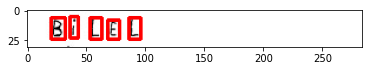

In [ ]:
word = get_word(letter)
print(word)
image_visualization(image, image_contours)